In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [99]:
# Load data
cleaned_df = pd.read_csv('C:/Users/yeuvi/Documents/MMU Doc/Degree/Sem 2/TML 6223 - Machine Learning/heart_2020_cleaned_D2.csv')

In [100]:
# Data preprocessing
# Encode categorical variables
label_encoders = {}
for column in cleaned_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    cleaned_df[column] = le.fit_transform(cleaned_df[column])
    label_encoders[column] = le

X = cleaned_df.drop('HeartDisease', axis=1)
y = cleaned_df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Model training with hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=10000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100]})

In [102]:
# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.740974686908801
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     58367
           1       0.22      0.77      0.34      5592

    accuracy                           0.74     63959
   macro avg       0.60      0.75      0.59     63959
weighted avg       0.90      0.74      0.80     63959



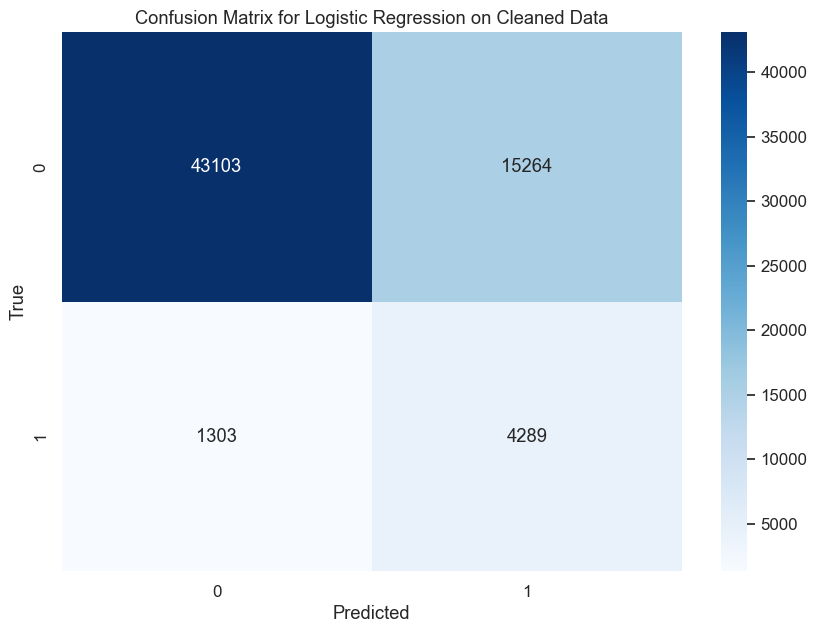

In [103]:
# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression on Cleaned Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()